### Question 1:

- Front housings for cell phones are manufactured in an injection molding process. The time the part is allowed to cool in the mold before removal is thought to influence the occurrence of a particularly troublesome cosmetic defect, flow lines, in the finished housing. After manufacturing, the housings are inspected visually and assigned a score between 1 and 10 based on their appearance, with 10 corresponding to a perfect part and 1 corresponding to a completely defective part. An experiment was conducted using two cool-down times, 10 and 20 seconds, and 20 housings were evaluated at each level of cool-down time. All 40 observations in this experiment were run in random order. The data are as follows:

- Table 1: Input data
1. 10 seconds 1 2 1 3 5 1 5 2 3 5 3 6 5 3 2 1 6 8 2 3
2. 20 seconds 7 8 5 9 5 8 6 4 6 7 6 9 5 7 4 6 8 5 8 7

a) Is there evidence to support the claim that the longer cool-down time results in fewer appearance defects? Use α = 0.05 and two-sample t-test.

In [22]:
# Find variance of a dataset
def var_find(x,mean):
    std=0
    for i in x:
        std+=(i-mean)**2
    return std

In [23]:
import numpy as np
from scipy import stats
import math

cool_down_10 = [1 ,2 ,1, 3, 5, 1, 5 ,2 ,3 ,5, 3, 6, 5, 3, 2, 1, 6 ,8 ,2, 3]
cool_down_20 = [7, 8, 5, 9, 5, 8 ,6 ,4, 6, 7, 6, 9, 5, 7, 4, 6 ,8 ,5, 8, 7]


n_10 = len(cool_down_10)
n_20 = len(cool_down_20)

dof=n_10 + n_20 - 2 # Degree of freedom

mean_10 = np.mean(cool_down_10)
mean_20 = np.mean(cool_down_20)
std_10 = (var_find(cool_down_10,mean_10)/(n_10-1))**0.5  # Degree of freedom used here is N-1
std_20 = (var_find(cool_down_20,mean_20)/(n_20-1))**0.5   # Degree of freedom used here is N-1

# Performing t-test 
pooled_var = ((n_10 - 1) * std_10**2 + (n_20 - 1) * std_20**2) / (dof) # Calculating Sp^2 value
pooled_std = pooled_var**0.5

# Calculate t-statistic
t_statistic = abs((mean_10 - mean_20) / math.sqrt(pooled_var * (1/n_10 + 1/n_20)))  # Taking absolute value of t0

# Calculate critical value of t
alpha = 0.05
t_critical = np.abs(np.round(stats.t.ppf(alpha/2, dof), 5))

# Determine p-value
p_value = 2 * stats.t.cdf(-np.abs(t_statistic), dof)

print("Sample 1 mean:", mean_10)
print("Sample 2 mean:", mean_20)
print("Sample 1 standard deviation:", std_10)
print("Sample 2 standard deviation:", std_20)
print("\nCalculated t-value:", t_statistic)
print("Calculated t-value for dof=38 and two tailed alpha=0.05:", t_critical)
print("p-value:", p_value)

if(t_statistic<t_critical and  p_value>alpha):
    print("\nAccept Null Hypothesis")
else:
    print("\nReject Null Hypothesis")

Sample 1 mean: 3.35
Sample 2 mean: 6.5
Sample 1 standard deviation: 2.007223796297028
Sample 2 standard deviation: 1.538967528127731

Calculated t-value: 5.569611087645751
Calculated t-value for dof=38 and two tailed alpha=0.05: 2.02439
p-value: 2.2166728350984177e-06

Reject Null Hypothesis


### Comments: 

- Since the absolute value of the t-statistic is greater than the critical value, and the p-value is less than the significance level of 0.05,we reject Null hyposthesis and we can conclude that there is evidence to support the claim that the longer cool-down time results in fewer appearance defects.

b) Find a 95 per cent confidence interval on the difference in means. Comment which sample should be chosen based on the upper bound value.

In [24]:
SE=math.sqrt(pooled_var*(1/n_10+1/n_20))
CI_lower = (mean_10 - mean_20) - t_critical * SE
CI_upper = (mean_10 - mean_20) + t_critical * SE

print("\nLower limit of Confidence Interval:",CI_lower)
print("Upper limit of Confidence Interval:",CI_upper)


Lower limit of Confidence Interval: -4.294932455722947
Upper limit of Confidence Interval: -2.0050675442770536


### Comments:

- The interval does not contain 0 in bewteen it's ranges. So we choose the absolute value highest negative value part i.e. the second sample is to be chosen.

- So we will be choosing the sample with 20 second cooldown.

c) Check the assumption of normality for the data from this experiment.(There will be two graphs; the x-axis will be time, i.e., '10 seconds' in the first graph and '20 seconds' in the second graph. The y-axis will be probability in both graphs. The plot colour should be RED for both graphs.)

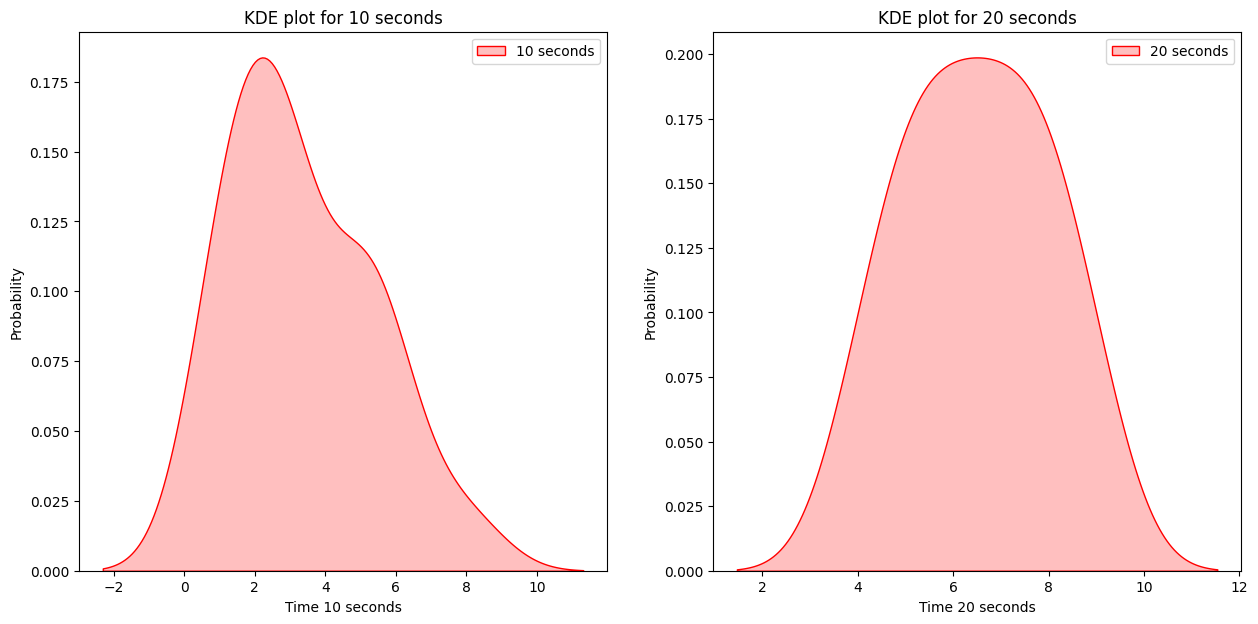

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plots
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15,7))

# Plot the KDE curve for each sample in a separate subplot
sns.kdeplot(ax=axes[0], data=cool_down_10, color='red', label='10 seconds',fill=True)
sns.kdeplot(ax=axes[1], data=cool_down_20, color='red', label='20 seconds',fill=True)

# Add title and axis labels
axes[0].set_title('KDE plot for 10 seconds')
axes[0].set_xlabel('Time 10 seconds')
axes[0].set_ylabel('Probability')
axes[1].set_title('KDE plot for 20 seconds')
axes[1].set_xlabel('Time 20 seconds')
axes[1].set_ylabel('Probability')

# Add legend to the first subplot
axes[0].legend()
axes[1].legend()

# Display the plot
plt.show()

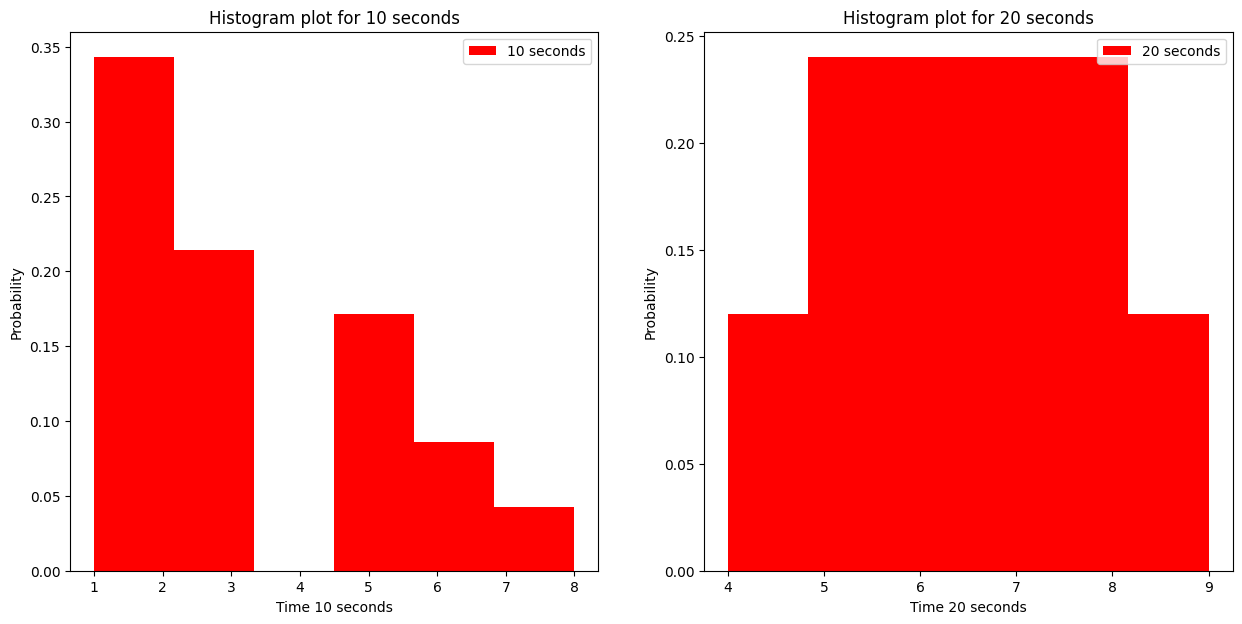

In [26]:
# Histogram plots
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs = axs.ravel()

# Plot the KDE curve for each sample in a separate subplot
axs[0].hist(cool_down_10, color='red', label='10 seconds',bins=6,density=True)
#sns.histplot(data=cool_down_20, color='red', label='20 seconds')

# Add title and axis labels
axs[0].set_title('Histogram plot for 10 seconds')
axs[0].set_xlabel('Time 10 seconds')
axs[0].set_ylabel('Probability')
axs[0].legend()

axs[1].hist(cool_down_20, color='red', label='20 seconds',bins=6,density=True)
axs[1].set_title('Histogram plot for 20 seconds')
axs[1].set_xlabel('Time 20 seconds')
axs[1].set_ylabel('Probability')
axs[1].legend()


# Display the plot
plt.show()

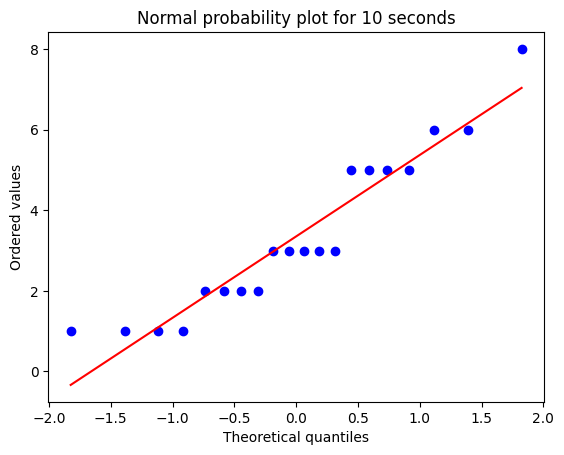

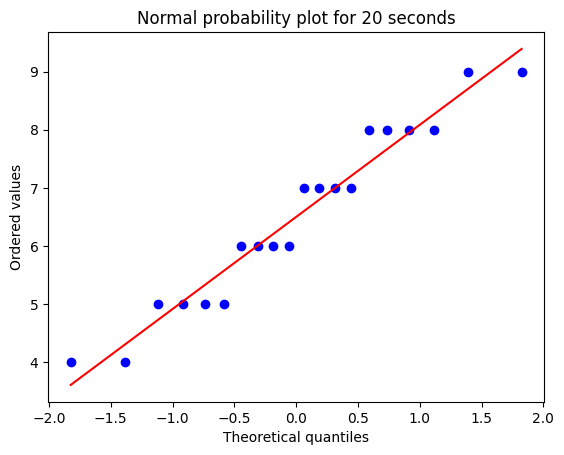

In [27]:
# Create normal probability plots

plt.figure()
stats.probplot(cool_down_10, plot=plt, fit=True)
plt.title('Normal probability plot for 10 seconds')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered values')
plt.show()

plt.figure()
stats.probplot(cool_down_20, plot=plt, fit=True)
plt.title('Normal probability plot for 20 seconds')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered values')
plt.show()

- Display the results in table format.

In [28]:
# Display results in Table 2 format

print("Two sample T test for 10 seconds vs 20 seconds\n")
print("\t\tN\tMean\t\tStd Dev")
print(f"10 seconds\t{n_10}\t{mean_10:.4f}\t\t{std_10:.4f}")
print(f"20 seconds\t{n_20}\t{mean_20:.4f}\t\t{std_20:.4f}\n")
print(f"T-test value: {t_statistic:.4f}")
print(f"95% upper bound for difference: {CI_upper:.4f}")
print(f"DoF: {dof}")

Two sample T test for 10 seconds vs 20 seconds

		N	Mean		Std Dev
10 seconds	20	3.3500		2.0072
20 seconds	20	6.5000		1.5390

T-test value: 5.5696
95% upper bound for difference: -2.0051
DoF: 38


### Comments:

- Based on the kde and histogram plots we can see that only the plot for the 20 s data can be called a proper normal distribution which is symmetric about the mean and mode.

- Also from the normal probplots we can see that only for 20 s does the straight line passes through the center of the data points at each levels. So this further justifies our above conclusion.

- However, for 10 s data the kde and histograms does not give a proper idea of normal plot. So from the probplot since we cannot find much deviation we can say that the 10 s data may be normallly distributed.